# Proyección con Run Rate

## Datos cargados de manera manual

Run rate anual proyectado: $602,448


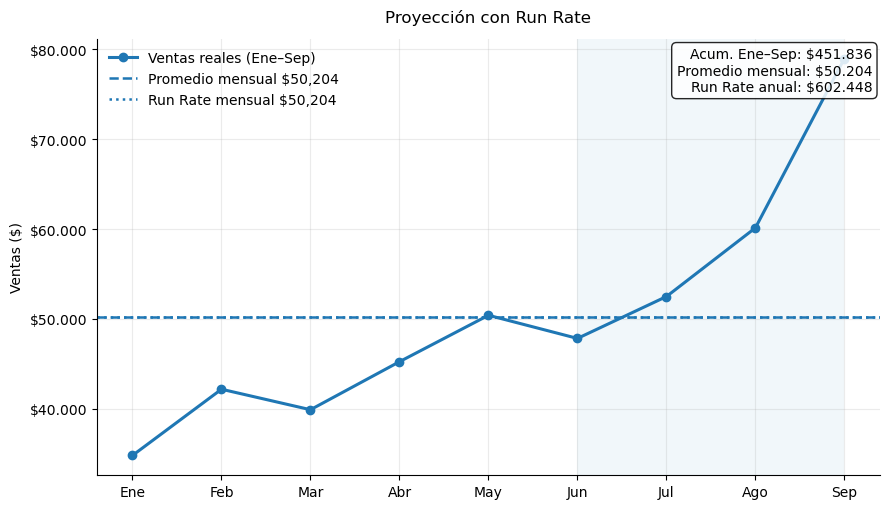

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Datos de ejemplo: ventas mensuales acumuladas hasta septiembre
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep"]
ventas = [34_783, 42_156, 39_874, 45_221, 50_392, 47_815, 52_478, 60_129, 78_988]

df = pd.DataFrame({"Mes": meses, "Ventas": ventas})

# Acumulado hasta septiembre

ventas_acumuladas = sum(ventas)
meses_transcurridos = len(ventas)
promedio_mensual = ventas_acumuladas / meses_transcurridos

# Run rate anual (extrapolación)

run_rate_anual = promedio_mensual * 12
print(f"Run rate anual proyectado: ${run_rate_anual:,.0f}")

# Gráfico

plt.figure(figsize=(9, 5.2))
plt.plot(meses, ventas, linewidth=2.2, marker="o", markersize=6, label="Ventas reales (Ene–Sep)")
plt.axhline(
    promedio_mensual, linestyle="--", linewidth=1.8,
    label=f"Promedio mensual ${promedio_mensual:,.0f}"
)
plt.axhline(
    run_rate_anual/12, linestyle=":", linewidth=1.8,
    label=f"Run Rate mensual ${run_rate_anual/12:,.0f}"
)
plt.axvspan(meses[-4], meses[-1], alpha=0.06)
plt.title("Proyección con Run Rate", pad=12)
plt.ylabel("Ventas ($)")

def miles_formatter(x, pos):
    return f"${x:,.0f}".replace(",", ".")
plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.grid(True, alpha=0.25)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

nota = (
    f"Acum. Ene–Sep: ${ventas_acumuladas:,.0f}\n"
    f"Promedio mensual: ${promedio_mensual:,.0f}\n"
    f"Run Rate anual: ${run_rate_anual:,.0f}"
).replace(",", ".")
plt.text(
    0.99, 0.98, nota,
    transform=plt.gca().transAxes,
    ha="right", va="top",
    bbox=dict(facecolor="white", alpha=0.85, boxstyle="round,pad=0.35")
)

plt.legend(frameon=False, loc="upper left")

plt.tight_layout()
plt.show()